In [138]:
%matplotlib inline
import sys
sys.path.insert(0, '/astro/users/ctslater/.local/lib/python3.6/site-packages')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.coordinates
import astropy.units as u

#plt.style.use(("paper_plots.mplstyle"))

matplotlib.rcParams['figure.dpi'] = 80

from astropy.coordinates import Galactocentric, Galactic, ICRS

import healpy as hp
import pickle

cmap = matplotlib.cm.coolwarm.set_under('w')


In [13]:
angle_lon, angle_lat = hp.pix2ang(hp.order2nside(7), np.arange(hp.nside2npix(hp.order2nside(7))),
                                    lonlat=True, nest=True)

coords = astropy.coordinates.SkyCoord(angle_lon*u.deg, angle_lat*u.deg, 10*u.kpc, frame='galactic')

In [14]:
galactocentric_angle = np.arctan2(coords.galactocentric.y, coords.galactocentric.x)
circular_vel = 210*u.km/u.s
vertical_vel = 0.0*u.km/u.s

gc_coord = Galactocentric(x=coords.galactocentric.x, y=coords.galactocentric.y, z=coords.galactocentric.z,
                          v_x = circular_vel * np.sin(galactocentric_angle),
                          v_y = circular_vel * np.cos(galactocentric_angle),
                          v_z = vertical_vel)

galactic_coords_w_pm = gc_coord.transform_to(Galactic)

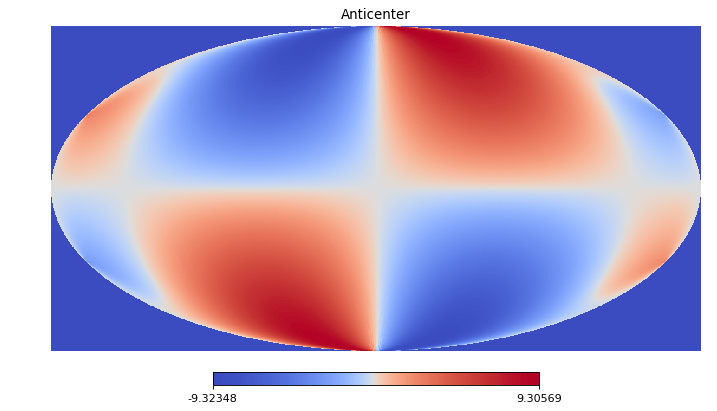

In [40]:
model_mean_mu_b = galactic_coords_w_pm.pm_b.to_value()
hp.mollview(model_mean_mu_b, title="Anticenter",
            rot=(180, 0, 0),
            cmap='coolwarm', #min=-0.7, max=0.7,
            xsize=1400,  #min=0.1, max=2.0,
            nest=True, norm='hist')

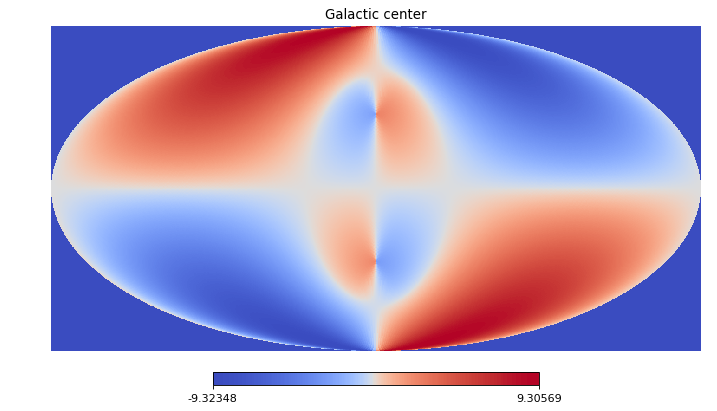

In [41]:
hp.mollview(model_mean_mu_b,
            title="Galactic center",
            #rot=(266.4 - 180, 28.94, -57 - 180),
            #rot=(266.4 - 180, 28.94, -57),
            cmap='coolwarm', #min=-0.7, max=0.7,
            xsize=1400,  #min=0.1, max=2.0,
            nest=True, norm='hist')

In [37]:
with open("map_pos_b.pkl", "rb") as f:
    map_pos_b = pickle.load(f)
with open("map_negative_b.pkl", "rb") as f:
    map_negative_b = pickle.load(f)
with open("map_mean_b.pkl", "rb") as f:
    map_mean_b = pickle.load(f)    

In [121]:
#rot=(266.4 - 180, 28.94, -57 - 180)
rot=(266.4 - 180, 28.94, -57)
def create_rotation_index(rot):
    r = hp.Rotator(rot=rot, inv=False)
    lon, lat = hp.pix2ang(hp.order2nside(7), np.arange(hp.nside2npix(hp.order2nside(7))),
                          lonlat=False, nest=True)
    r_lon, r_lat = r(lon, lat)
    r_pix = hp.ang2pix(hp.order2nside(7), r_lon, r_lat, nest=True, lonlat=False)
    return r_pix

In [136]:
def make_scalebar(bins, value, fig, label=""):
    ax2 = fig.add_axes(matplotlib.axes.Axes(fig=fig, rect=[0.03, 0.15, 0.2, 0.08]))
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    ax2.set_frame_on(False)
    ax2.plot([bins[0], bins[-1]], [0, 0], 'k-')

    ax2.text(0.5*(bins[0] + bins[-1]), -0.7, label, fontsize='x-large')
    for bin_n in [0, -1]:
        ax2.plot([bins[bin_n], bins[bin_n]], [-0.5, 1], 'k-')
        ax2.text(bins[bin_n], -1, "{:.1f}".format(bins[bin_n]), horizontalalignment="center", fontsize='large')
    ax2.plot([ value ]*2, [0, 1], 'b-', lw=3)        


<Figure size 480x320 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

<Figure size 680x432 with 0 Axes>

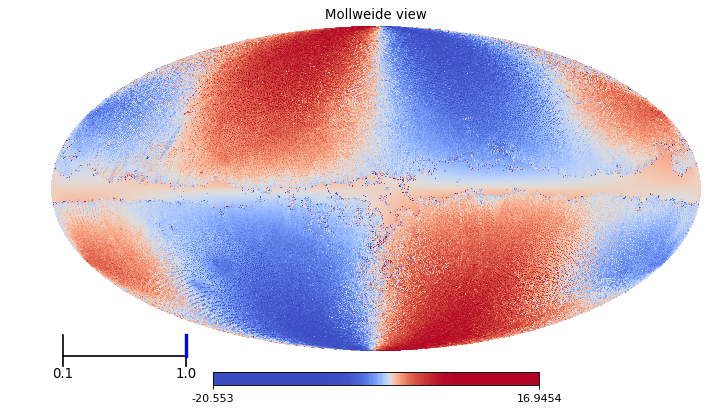

In [142]:
# map_mean_b is in equatorial healpix, model is in galactic healpix
from matplotlib.backends.backend_pdf import PdfPages


r_pix = create_rotation_index((266.4 - 180, 28.94, -57))
r_pix2 = create_rotation_index((180, 0, 0))

scale_iter = np.linspace(0.1, 1.0, 12)

with PdfPages('subtract_model_mu_b.pdf') as pdf:
    for model_scale in scale_iter:
        plt.clf()
        
        adjusted_map = np.zeros(len(map_mean_b))
        adjusted_map[r_pix] = map_mean_b 
        adjusted_map[r_pix2] += -model_scale * model_mean_mu_b

        hp.mollview(adjusted_map,
                    cmap='coolwarm', #min=-0.7, max=0.7,
                    xsize=1400,  #min=0.1, max=2.0,
                    nest=True, norm='hist')
        make_scalebar(scale_iter, model_scale, plt.gcf())
        pdf.savefig();

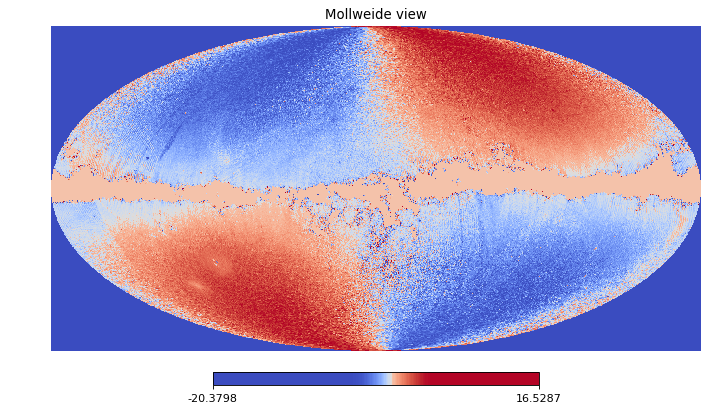

In [119]:
raw_map = np.arctan2(map_pos_b, map_negative_b) - np.arctan(1)
hp.mollview(map_mean_b, #rot=(266.4 - 180, 28.94, -57 - 180),
            rot=(266.4 - 180, 28.94, -57),
            cmap='coolwarm', #min=-0.7, max=0.7,
            xsize=1400,  #min=0.1, max=2.0,
            nest=True, norm='hist')